In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
df=pd.read_csv('./data/city_province_newlyweds_overal.csv')

In [5]:
df # 단위 쌍

,행정구역별,시점,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
0,전국,2015,1471647,595850,40.5,640709,43.5,828486,1.3,0.93
1,전국,2016,1436948,603281,42.0,633642,44.1,827329,1.3,0.92
2,전국,2017,1379766,585957,42.5,616621,44.7,801757,1.3,0.91
3,전국,2018,1322406,594409,44.9,594721,45.0,771206,1.3,0.87
4,전국,2019,1260117,582985,46.3,557592,44.2,721051,1.3,0.84
...,...,...,...,...,...,...,...,...,...,...
121,제주특별자치도,2017,18546,8030,43.3,7972,43.0,10794,1.4,1.01
122,제주특별자치도,2018,18387,8294,45.1,7950,43.2,11094,1.4,0.97
123,제주특별자치도,2019,17682,8114,45.9,7616,43.1,10455,1.4,0.95
124,제주특별자치도,2020,16868,7941,47.1,7161,42.5,9899,1.4,0.93


In [6]:
# 특성별 신혼부부 수 통계

In [7]:
# (2015-2021)우리나라 전국 총 신혼부부(연도별)

In [57]:
df01 = df.loc[df['행정구역별'] == '전국',['시점','신혼부부 수 (A)']]

In [58]:
df01

,시점,신혼부부 수 (A)
0,2015,1471647
1,2016,1436948
2,2017,1379766
3,2018,1322406
4,2019,1260117
5,2020,1183750
6,2021,1101455


C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


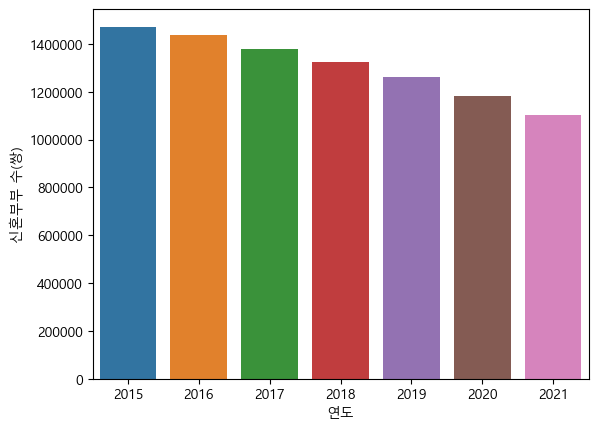

In [62]:
sb.barplot(data=df01, x='시점', y='신혼부부 수 (A)')
plt.xlabel('연도')
plt.ylabel('신혼부부 수(쌍)')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

In [11]:
# (2015-2021)우리나라 전국 총 신혼부부 수(시도별)

In [53]:
df02 = df.loc[df['행정구역별']=='서울특별시',['시점','신혼부부 수 (A)']]

In [54]:
df02

,시점,신혼부부 수 (A)
7,2015,291341
8,2016,278294
9,2017,263148
10,2018,246867
11,2019,232454
12,2020,219101
13,2021,200477


C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

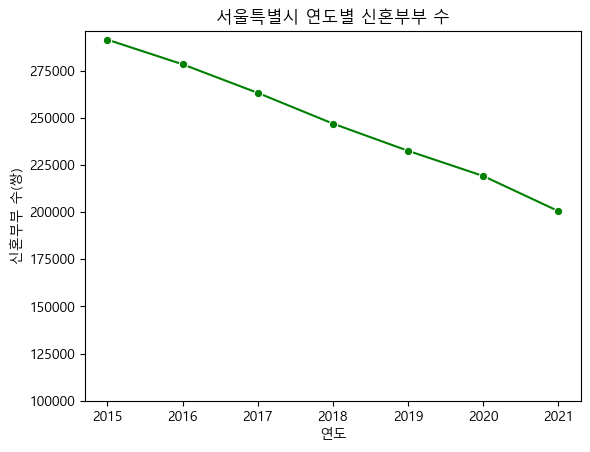

In [73]:
ax=sb.lineplot(data=df02, x='시점', y='신혼부부 수 (A)', color='g', marker='o')
plt.title('서울특별시 연도별 신혼부부 수')
plt.xlabel('연도')
plt.ylabel('신혼부부 수(쌍)')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax.set_ylim(100000)
plt.show()

In [13]:
#신혼부부 특성별 소득 현황

In [14]:
df2 = pd.read_csv('./data/newlywed_couple_ income_status.csv')

In [15]:
df2

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득구간별(1),데이터
0,2015,전국,소계,소득 평균 (만원),4569
1,2015,혼인연차별,혼인1년차,소득 평균 (만원),4636
2,2015,혼인연차별,혼인2년차,소득 평균 (만원),4442
3,2015,혼인연차별,혼인3년차,소득 평균 (만원),4441
4,2015,혼인연차별,혼인4년차,소득 평균 (만원),4642
...,...,...,...,...,...
205,2021,맞벌이여부별,미상,소득 평균 (만원),967
206,2021,출산자녀수별,무자녀,소득 평균 (만원),6684
207,2021,출산자녀수별,유자녀,소득 평균 (만원),5655
208,2021,주택소유물건수별,주택 미소유,소득 평균 (만원),5521


In [16]:
df2 = df2.rename(columns={'데이터':'소득 평균(만원)'})

In [17]:
df2

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득구간별(1),소득 평균(만원)
0,2015,전국,소계,소득 평균 (만원),4569
1,2015,혼인연차별,혼인1년차,소득 평균 (만원),4636
2,2015,혼인연차별,혼인2년차,소득 평균 (만원),4442
3,2015,혼인연차별,혼인3년차,소득 평균 (만원),4441
4,2015,혼인연차별,혼인4년차,소득 평균 (만원),4642
...,...,...,...,...,...
205,2021,맞벌이여부별,미상,소득 평균 (만원),967
206,2021,출산자녀수별,무자녀,소득 평균 (만원),6684
207,2021,출산자녀수별,유자녀,소득 평균 (만원),5655
208,2021,주택소유물건수별,주택 미소유,소득 평균 (만원),5521


In [18]:
df2.drop('소득구간별(1)',axis=1)

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득 평균(만원)
0,2015,전국,소계,4569
1,2015,혼인연차별,혼인1년차,4636
2,2015,혼인연차별,혼인2년차,4442
3,2015,혼인연차별,혼인3년차,4441
4,2015,혼인연차별,혼인4년차,4642
...,...,...,...,...
205,2021,맞벌이여부별,미상,967
206,2021,출산자녀수별,무자녀,6684
207,2021,출산자녀수별,유자녀,5655
208,2021,주택소유물건수별,주택 미소유,5521


In [19]:
df2_result = (df2['시점']==2015) & (df2['신혼부부 특성별(1)']=='혼인연차별') & (df2['신혼부부 특성별(2)']=='혼인1년차')

In [20]:
df2_result

0      False
1       True
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

In [21]:
df2_result_final = df2.loc[df2_result,'소득 평균(만원)'].values

In [22]:
df2_result_final[0]

4636

In [23]:
#2. 신혼부부 주택 소유 비중

In [24]:
df3 = pd.read_csv('./data/house_newlyweds.csv')

In [25]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유
0,2015,전국,소계,830938,640709
1,2015,혼인연차별,혼인 1년차,185221,105545
2,2015,혼인연차별,혼인 2년차,177166,117796
3,2015,혼인연차별,혼인 3년차,166415,133128
4,2015,혼인연차별,혼인 4년차,157563,139555
...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404
213,2021,남편 연령별,35~39세,176400,153410
214,2021,남편 연령별,40~44세,72814,71140
215,2021,남편 연령별,45~49세,31254,33697


In [26]:
df3['주택 소유'] = df3['주택 소유'].str.replace('X','0')

In [27]:
df3['주택 소유']=df3['주택 소유'].astype(int)

In [28]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유
0,2015,전국,소계,830938,640709
1,2015,혼인연차별,혼인 1년차,185221,105545
2,2015,혼인연차별,혼인 2년차,177166,117796
3,2015,혼인연차별,혼인 3년차,166415,133128
4,2015,혼인연차별,혼인 4년차,157563,139555
...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404
213,2021,남편 연령별,35~39세,176400,153410
214,2021,남편 연령별,40~44세,72814,71140
215,2021,남편 연령별,45~49세,31254,33697


In [29]:
df3_sum = df3[['주택 미소유','주택 소유']].sum(axis=1)

In [30]:
df3['주택 보유율'] = df3['주택 소유']/df3_sum*100

In [31]:
df3.round(2)

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유,주택 보유율
0,2015,전국,소계,830938,640709,43.54
1,2015,혼인연차별,혼인 1년차,185221,105545,36.30
2,2015,혼인연차별,혼인 2년차,177166,117796,39.94
3,2015,혼인연차별,혼인 3년차,166415,133128,44.44
4,2015,혼인연차별,혼인 4년차,157563,139555,46.97
...,...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404,37.95
213,2021,남편 연령별,35~39세,176400,153410,46.51
214,2021,남편 연령별,40~44세,72814,71140,49.42
215,2021,남편 연령별,45~49세,31254,33697,51.88


In [32]:
# 우리나라 총 신혼부부 주택 소유 비중(단위 : 쌍)

In [74]:
df30 =df3.loc[df3['신혼부부 특성별(1)']=='전국',['시점','주택 보유율']]

In [75]:
df30

,시점,주택 보유율
0,2015,43.536867
31,2016,44.096376
62,2017,44.690259
93,2018,44.972648
124,2019,44.249224
155,2020,43.630919
186,2021,43.559746


In [98]:
df30['주택 보유율']=df30['주택 보유율'].round(2)

C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


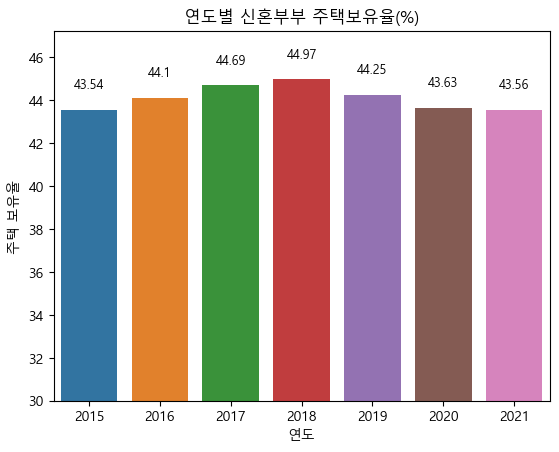

In [104]:
ax = sb.barplot(data=df30, x='시점', y="주택 보유율", )

plt.title('연도별 신혼부부 주택보유율(%)')
plt.xlabel('연도')
ax.set_ylim(30)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

plt.show()

In [35]:
df3

,시점,신혼부부 특성별(1),신혼부부 특성별(2),주택 미소유,주택 소유,주택 보유율
0,2015,전국,소계,830938,640709,43.536867
1,2015,혼인연차별,혼인 1년차,185221,105545,36.298948
2,2015,혼인연차별,혼인 2년차,177166,117796,39.935992
3,2015,혼인연차별,혼인 3년차,166415,133128,44.443703
4,2015,혼인연차별,혼인 4년차,157563,139555,46.969554
...,...,...,...,...,...,...
212,2021,남편 연령별,30~34세,211626,129404,37.945049
213,2021,남편 연령별,35~39세,176400,153410,46.514660
214,2021,남편 연령별,40~44세,72814,71140,49.418564
215,2021,남편 연령별,45~49세,31254,33697,51.880648


In [120]:
df34 = df3.loc[(df3['시점']==2021) & (df3['신혼부부 특성별(1)']=='혼인연차별'),['신혼부부 특성별(2)','주택 보유율']]
df34['주택 보유율']=df34['주택 보유율'].round(2)
df34

,신혼부부 특성별(2),주택 보유율
187,혼인 1년차,33.81
188,혼인 2년차,38.12
189,혼인 3년차,42.84
190,혼인 4년차,48.14
191,혼인 5년차,52.37


In [122]:
df35 = df3.loc[(df3['시점']==2015) & (df3['신혼부부 특성별(1)']=='혼인연차별'),['신혼부부 특성별(2)','주택 보유율']]
df35['주택 보유율']=df35['주택 보유율'].round(2)
df35

,신혼부부 특성별(2),주택 보유율
1,혼인 1년차,36.30
2,혼인 2년차,39.94
3,혼인 3년차,44.44
4,혼인 4년차,46.97
5,혼인 5년차,50.02


,신혼부부 특성별(2),주택 보유율
187,혼인 1년차,33.81
188,혼인 2년차,38.12
189,혼인 3년차,42.84
190,혼인 4년차,48.14
191,혼인 5년차,52.37


C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

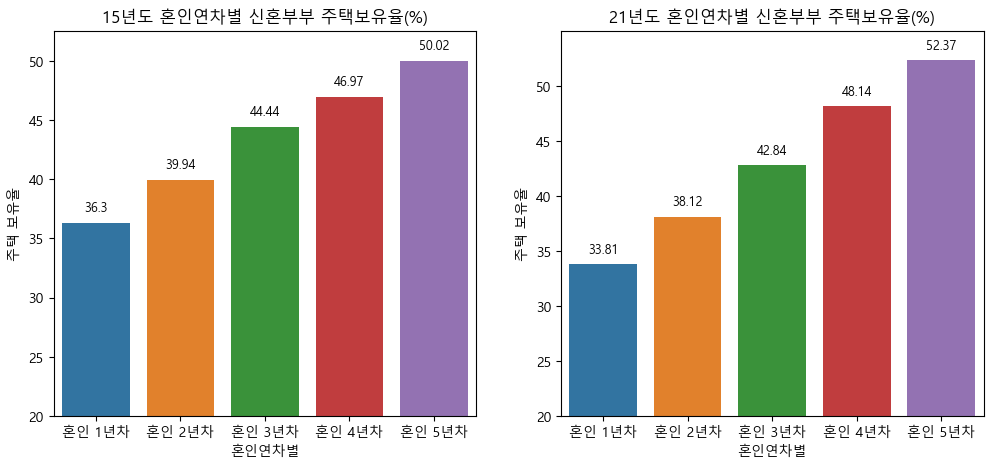

In [123]:
plt.figure(figsize=(12,5))

plt. subplot(1,2,1)

ax= sb.barplot(data=df35, y='주택 보유율', x='신혼부부 특성별(2)')
plt.title('15년도 혼인연차별 신혼부부 주택보유율(%)')
plt.xlabel('혼인연차별')
ax.set_ylim(20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

    
plt. subplot(1,2,2)

ax= sb.barplot(data=df34, y='주택 보유율', x='신혼부부 특성별(2)')
plt.title('21년도 혼인연차별 신혼부부 주택보유율(%)')
plt.xlabel('혼인연차별')
ax.set_ylim(20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

    
    
plt.show()

In [ ]:
#신혼부부 특성별 평균 소득 현황(주택소유 여부에 따른 소득 차이)

In [134]:
df4 = pd.read_csv('./data/newlywed_house_salary.csv')

In [135]:
df4

,시점,신혼부부 특성별(1),신혼부부 특성별(2),소득구간별(1),데이터
0,2015,주택소유물건수별,주택 미소유,소득 평균 (만원),4133
1,2015,주택소유물건수별,주택 소유,소득 평균 (만원),5135
2,2016,주택소유물건수별,주택 미소유,소득 평균 (만원),4368
3,2016,주택소유물건수별,주택 소유,소득 평균 (만원),5297
4,2017,주택소유물건수별,주택 미소유,소득 평균 (만원),4588
5,2017,주택소유물건수별,주택 소유,소득 평균 (만원),5535
6,2018,주택소유물건수별,주택 미소유,소득 평균 (만원),4762
7,2018,주택소유물건수별,주택 소유,소득 평균 (만원),5787
8,2019,주택소유물건수별,주택 미소유,소득 평균 (만원),4893
9,2019,주택소유물건수별,주택 소유,소득 평균 (만원),5992


In [143]:
df4.loc[(df4['시점']==2021)&(df4['신혼부부 특성별(2)']=='주택 미소유'),"데이터"].values[0]

5521

In [ ]:
# 아동 유무 가구에 따른 주택 소유율

In [ ]:
#  03 맞벌이 신혼부부 비중

In [ ]:
# 우리나라 총 신혼부부 맞벌이 비중(연도별)

In [147]:
df5 = pd.read_csv('./data/newlywed_all.csv')

In [148]:
df5

,시점,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수
0,2015,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93
1,2016,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92
2,2017,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91
3,2018,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87
4,2019,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84
5,2020,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81
6,2021,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80


C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


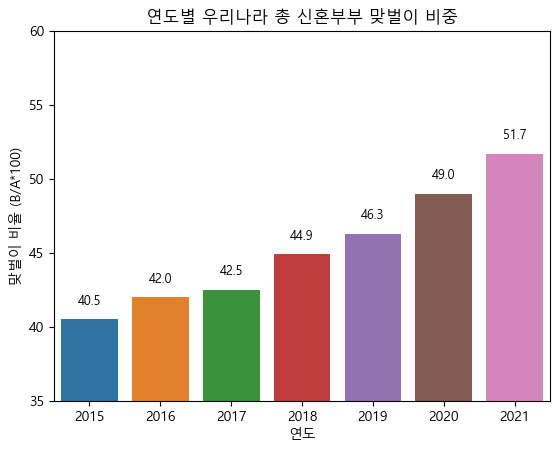

In [160]:
ax = sb.barplot(data=df5, x='시점', y="맞벌이 비율 (B/A*100)")

plt.title('연도별 우리나라 총 신혼부부 맞벌이 비중')
plt.xlabel('연도')
ax.set_ylim(35,60)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height +1, height, ha = 'center', size = 9)

plt.show()

In [ ]:
# 신혼 부부의 맞벌이/외벌이 추이(%)(15~21년 자료 그래프로 표시)

In [162]:
df5['외벌이 비율 ((A-B)/A*100)']=(df5['신혼부부 수 (A)']-df5['맞벌이 부부 수 (B)'])/df5['신혼부부 수 (A)']*100

In [164]:
df5['외벌이 비율 ((A-B)/A*100)'] =df5['외벌이 비율 ((A-B)/A*100)'].round(2)

In [165]:
df5

,시점,행정구역별,신혼부부 수 (A),맞벌이 부부 수 (B),맞벌이 비율 (B/A*100),주택소유 신혼부부 수 (C),주택 소유율 (C/A*100),총 소유 주택 수 (D)\t,소유부부기준 1쌍당 평균 소유주택 수 (D/C),평균 출생아 수,외벌이 비율 ((A-B)/A*100)
0,2015,전국,1471647,595850,40.5,640709,43.5,828486,1.3,0.93,59.51
1,2016,전국,1436948,603281,42.0,633642,44.1,827329,1.3,0.92,58.02
2,2017,전국,1379766,585957,42.5,616621,44.7,801757,1.3,0.91,57.53
3,2018,전국,1322406,594409,44.9,594721,45.0,771206,1.3,0.87,55.05
4,2019,전국,1260117,582985,46.3,557592,44.2,721051,1.3,0.84,53.74
5,2020,전국,1183750,580089,49.0,516481,43.6,663221,1.3,0.81,51.00
6,2021,전국,1101455,569472,51.7,479791,43.6,603763,1.3,0.80,48.30


In [228]:
df5554 = df5[['맞벌이 비율 (B/A*100)','외벌이 비율 ((A-B)/A*100)']]

C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\505\anaconda3\envs\streamlit39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

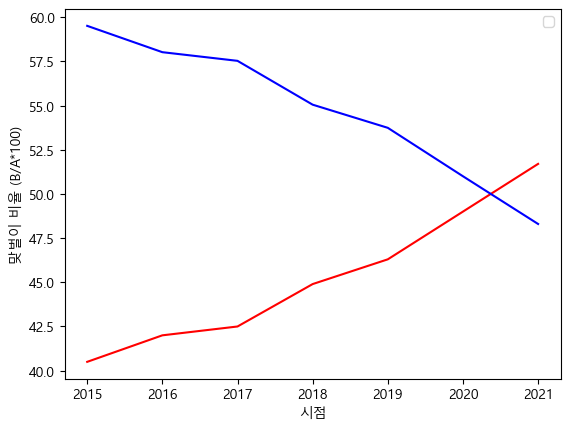

In [241]:


sb.lineplot(data=df5554,x=df5['시점'],y=df5['맞벌이 비율 (B/A*100)'], color='r')
sb.lineplot(data=df5554, x=df5['시점'],y=df5['외벌이 비율 ((A-B)/A*100)'], color='b')
plt.legend()
plt.show()

In [ ]:
# 혼인연차별 맞벌이 비중(셀렉트박스 활용) n년차 부부 맞벌이 비중

In [246]:
df6 = pd.read_csv('./data/couple_work.csv')

In [247]:
df6

,시점,신혼부부 특성별(1),신혼부부 특성별(2),맞벌이,외벌이
0,2021,혼인연차별,혼인 1년차,107972,70349
1,2021,혼인연차별,혼인 2년차,112582,82591
2,2021,혼인연차별,혼인 3년차,114331,95806
3,2021,혼인연차별,혼인 4년차,117770,103311
4,2021,혼인연차별,혼인 5년차,116817,105012


In [251]:
df6['전체'] = df6['맞벌이']+df6['외벌이']

df6

In [252]:
df6

,시점,신혼부부 특성별(1),신혼부부 특성별(2),맞벌이,외벌이,전체
0,2021,혼인연차별,혼인 1년차,107972,70349,178321
1,2021,혼인연차별,혼인 2년차,112582,82591,195173
2,2021,혼인연차별,혼인 3년차,114331,95806,210137
3,2021,혼인연차별,혼인 4년차,117770,103311,221081
4,2021,혼인연차별,혼인 5년차,116817,105012,221829


In [253]:
fgg=df6['맞벌이']/df6['전체']*100

In [256]:
df6['맞벌이 비율']=fgg.round(2)

In [257]:
df6

,시점,신혼부부 특성별(1),신혼부부 특성별(2),맞벌이,외벌이,전체,맞벌이 비율
0,2021,혼인연차별,혼인 1년차,107972,70349,178321,60.55
1,2021,혼인연차별,혼인 2년차,112582,82591,195173,57.68
2,2021,혼인연차별,혼인 3년차,114331,95806,210137,54.41
3,2021,혼인연차별,혼인 4년차,117770,103311,221081,53.27
4,2021,혼인연차별,혼인 5년차,116817,105012,221829,52.66


In [258]:
df6.loc[df6['신혼부부 특성별(2)']=='혼인 1년차','맞벌이 비율']

0    60.55
Name: 맞벌이 비율, dtype: float64

In [ ]:
# 혼인연차별 첫째자녀 출산하는 부부 수

In [302]:
df7=pd.read_csv('./data/couple_baby.csv')

In [303]:
df7

,시점,첫째자녀의 출산 소요기간별(1),신혼부부 특성별(1),신혼부부 특성별(2),데이터
0,2021,합계,혼인연차별,혼인 1년차,54698
1,2021,합계,혼인연차별,혼인 2년차,97484
2,2021,합계,혼인연차별,혼인 3년차,136244
3,2021,합계,혼인연차별,혼인 4년차,167010
4,2021,합계,혼인연차별,혼인 5년차,184064


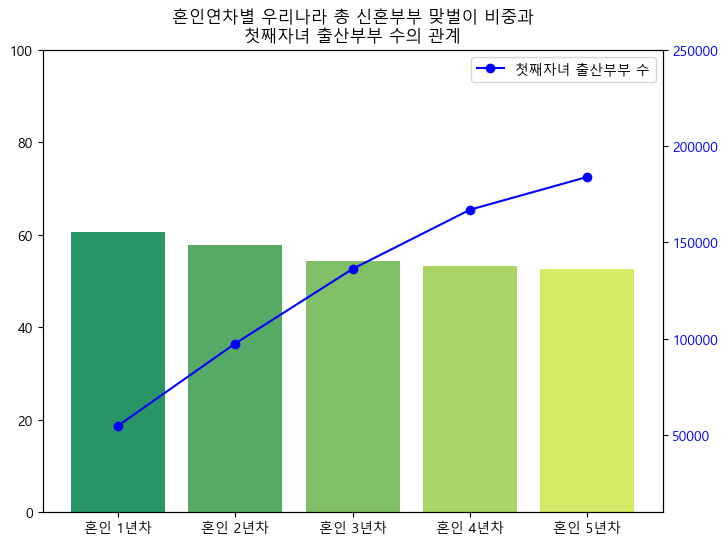

In [325]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sb.color_palette('summer',len(df6['신혼부부 특성별(2)']))

ax1.bar(df6['신혼부부 특성별(2)'], df6["맞벌이 비율"], color=colors, label='맞벌이 비율')
plt.ylim(0,100)
ax2 = ax1.twinx()

colors2='blue'

ax2.plot(df7['신혼부부 특성별(2)'], df7["데이터"], color=colors2,marker='o', label='첫째자녀 출산부부 수')
ax2.tick_params(axis='y', labelcolor=colors2)


plt.title('혼인연차별 우리나라 총 신혼부부 맞벌이 비중과\n첫째자녀 출산부부 수의 관계')
plt.xlabel('혼인연차')
plt.legend()
plt.ylim(10000,250000)
plt.show()

In [ ]:
# 가사분담은 어떻게 해야한다고 생각하는지?

In [ ]:
# 가사분담에 대한 견해 (통계청_2022년 사회조사 결과 참고)

In [347]:
df8=pd.read_csv('./data/homework.csv')

In [357]:
df8

,특성별(1),견해별(1),2022
0,전체,남편이 전적으로 책임,0.5
1,전체,남편이 주로 하고 아내도 분담,2.6
2,전체,공평하게 분담,74.7
3,전체,아내가 주로 하고 남편도 분담,16.9
4,전체,아내가 전적으로 책임,5.3


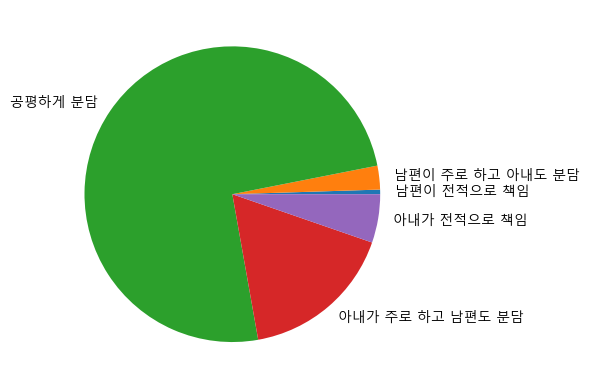

In [362]:
plt.pie(df8['2022'],labels=df8['견해별(1)'])
plt.show()

In [351]:
# 실제 가사 분담은 어떻게 이루어지고 있는지?

In [352]:
df9=pd.read_csv('./data/homework_real.csv')

In [355]:
df9

,특성별(1),분담실태별(1),2022
0,전체,남편이 전적으로 책임,1.3
1,전체,남편이 주로 하고 아내도 분담,6.7
2,전체,공평하게 분담,30.6
3,전체,아내가 주로 하고 남편도 분담,34.9
4,전체,아내가 전적으로 책임,26.5


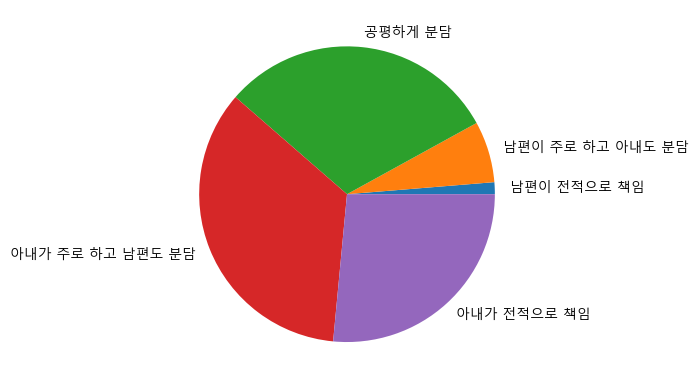

In [365]:
plt.pie(df9['2022'],labels=df9['분담실태별(1)'])
plt.show()

In [396]:
df8
df8['2022']

,특성별(1),견해별(1),2022
0,전체,남편이 전적으로 책임,0.5
1,전체,남편이 주로 하고 아내도 분담,2.6
2,전체,공평하게 분담,74.7
3,전체,아내가 주로 하고 남편도 분담,16.9
4,전체,아내가 전적으로 책임,5.3


In [392]:

df9


,특성별(1),분담실태별(1),2022
0,전체,남편이 전적으로 책임,1.3
1,전체,남편이 주로 하고 아내도 분담,6.7
2,전체,공평하게 분담,30.6
3,전체,아내가 주로 하고 남편도 분담,34.9
4,전체,아내가 전적으로 책임,26.5


In [ ]:
# 견해와 실태의 차이 %

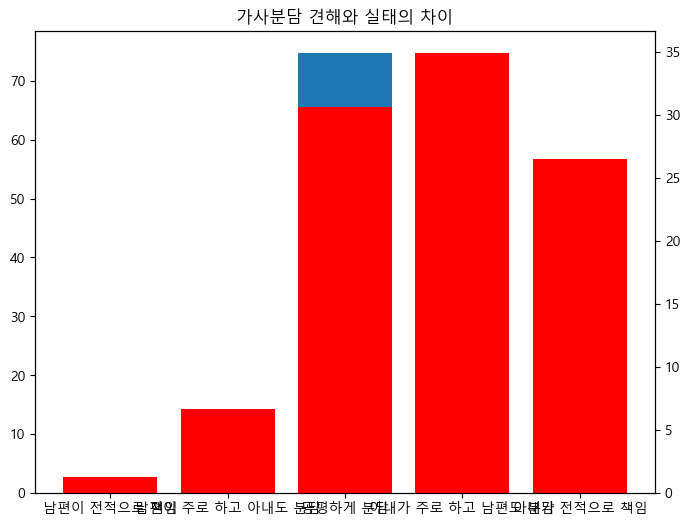

In [394]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()


ax1.bar(df8['견해별(1)'], df8['2022'], label='견해')
ax2 = ax1.twinx()


ax2.bar(df9['분담실태별(1)'],df9['2022'],color='r', label='실태')

plt.title('가사분담 견해와 실태의 차이')
plt.show()